# Preprocessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Step 1:
- Read the boston house dataset

- Create train and test datasets.

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('boston_house_prices.csv')

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.shape

(506, 14)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# Separate features and target variable
X = df.drop(columns=['MEDV']) # features all column except the target
y=  df.MEDV

In [9]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
print( X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


### Step 2:
Create a scatter plot of each attribute with the mean house price.

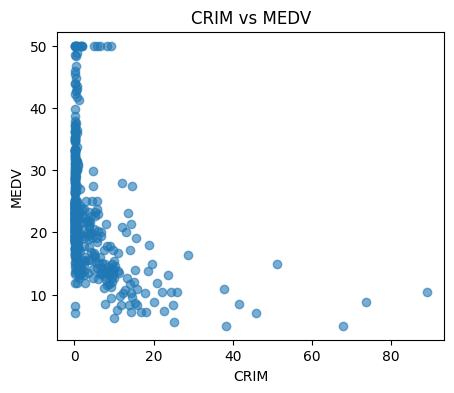

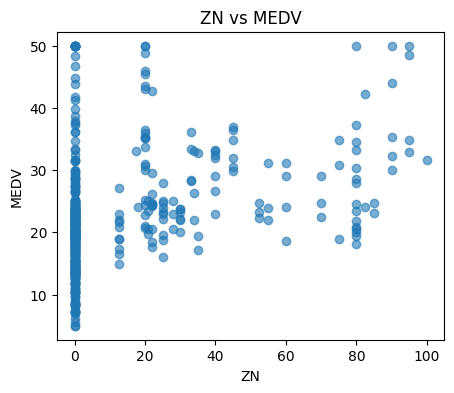

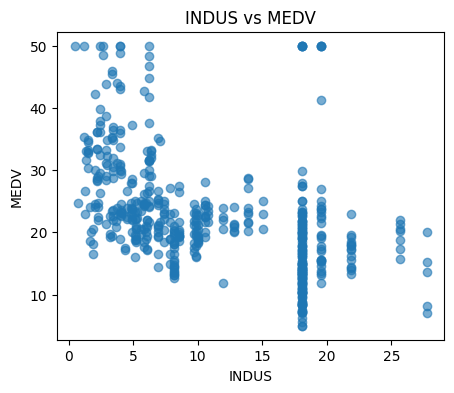

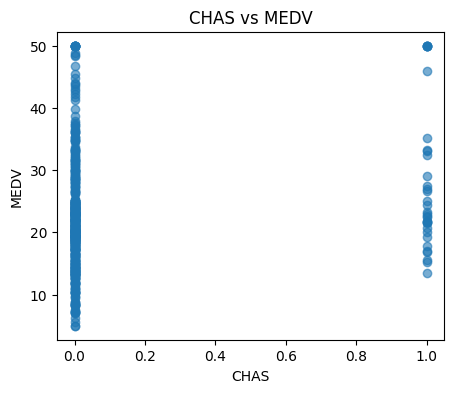

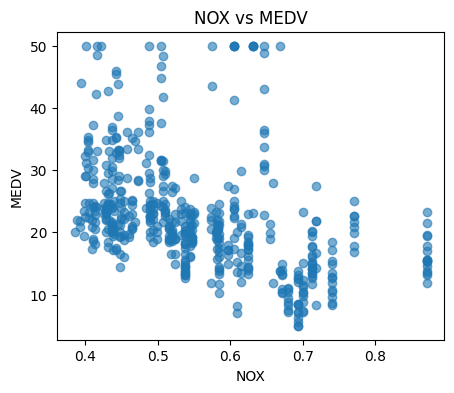

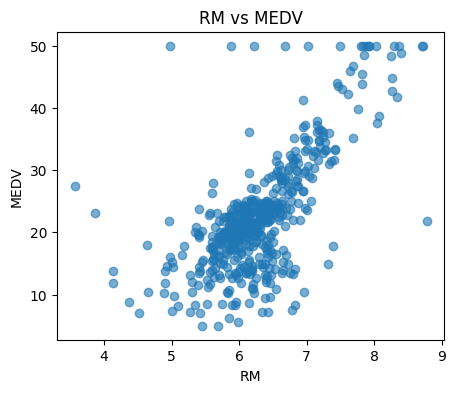

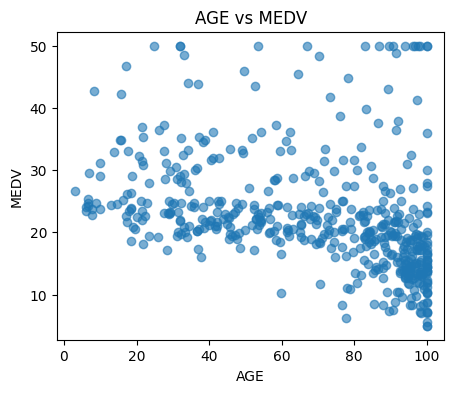

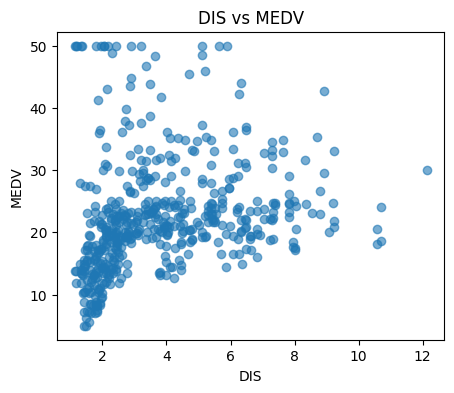

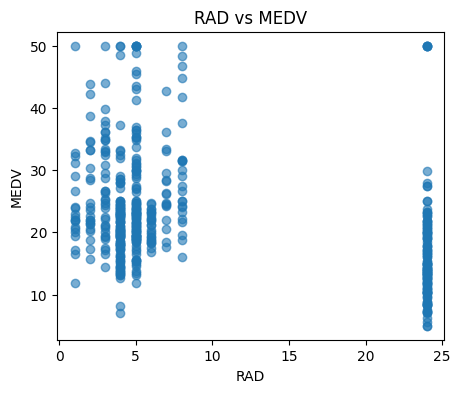

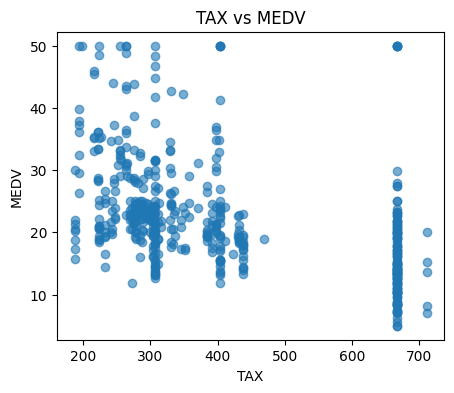

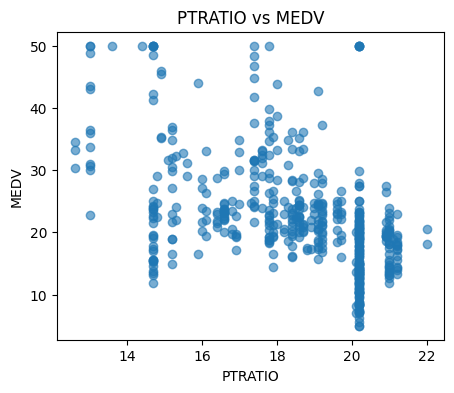

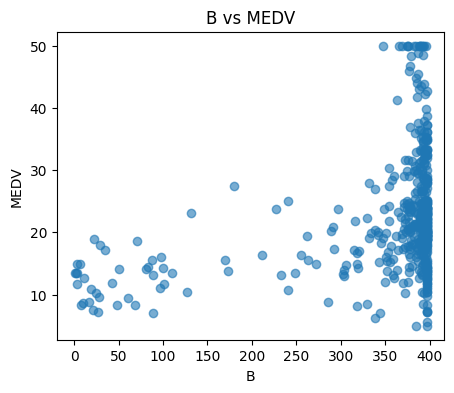

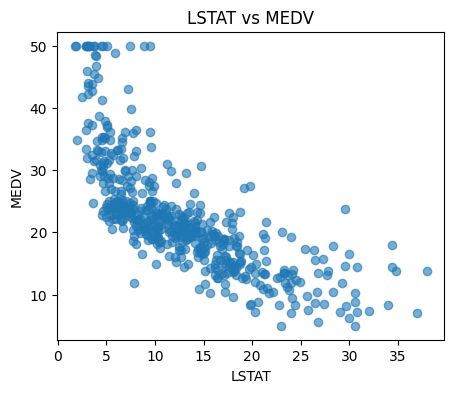

In [11]:
# Loop through each column and create scatter plots
for column in df.columns[:-1]:  # Exclude 'MEDV'
    plt.figure(figsize=(5, 4))  # Set figure size for each plot
    plt.scatter(df[column], df['MEDV'], alpha=0.6)
    plt.xlabel(column)
    plt.ylabel("MEDV")
    plt.title(f"{column} vs MEDV")
    plt.show()  # Show each plot separately

### Step 3:
Create a box plot of all attributes.

In [12]:
# Set figure size
plt.figure(figsize=(10, 6))


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

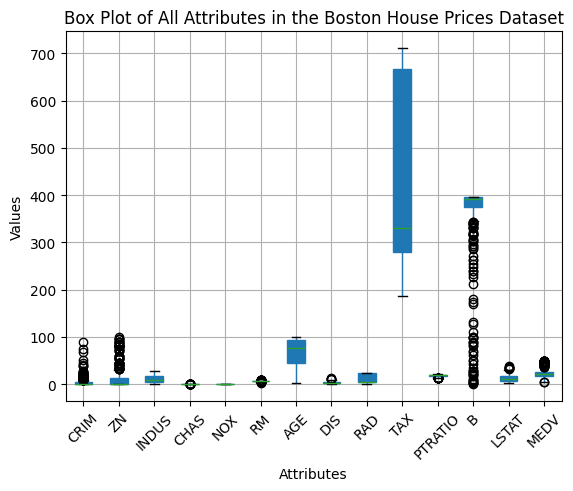

In [17]:
df.boxplot(rot=45, patch_artist=True)  # Rotate x-axis labels for better readability, patch_artist=True Fills boxes with color
plt.title("Box Plot of All Attributes in the Boston House Prices Dataset")
plt.xlabel("Attributes")
plt.ylabel("Values")
plt.show()

### Step 4:
Use `StandardScaler()` to scale the trainin data set.

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [21]:
# Fit and transform the features
X_scaled = scaler.fit_transform(X_train)


In [22]:
# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X_train.columns)

In [23]:
print(X_scaled_df.head())

       CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
0  1.291339 -0.500320  1.033237 -0.278089  0.489252 -1.428069  1.028015   
1 -0.333810 -0.500320 -0.413160 -0.278089 -0.157233 -0.680087 -0.431199   
2 -0.400723  1.013271 -0.715218 -0.278089 -1.008723 -0.402063 -1.618599   
3  0.391278 -0.500320  1.033237 -0.278089  0.489252 -0.300450  0.591681   
4 -0.322701 -0.500320 -0.413160 -0.278089 -0.157233 -0.831094  0.033747   

        DIS       RAD       TAX   PTRATIO         B     LSTAT  
0 -0.802173  1.706891  1.578434  0.845343 -0.074337  1.753505  
1  0.324349 -0.624360 -0.584648  1.204741  0.430184 -0.561474  
2  1.330697 -0.974048 -0.602724 -0.637176  0.065297 -0.651595  
3 -0.839240  1.706891  1.578434  0.845343 -3.868193  1.525387  
4 -0.005494 -0.624360 -0.584648  1.204741  0.379119 -0.165787  


### Step 5:
Use `KNeighborsRegressor()` to fit both not-scaled and scaled datasets. Check the scores of test dataset for both models.

In [24]:
from sklearn.neighbors import KNeighborsRegressor

In [27]:
# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) # Scale test data too


In [28]:
# Train KNN on unscaled data
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
print("Test Score (Not-Scaled Data):", knn.score(X_test, y_test))

Test Score (Not-Scaled Data): 0.6475049964305033


In [29]:
# Train KNN on scaled data
knn.fit(X_train_scaled, y_train)
print("Test Score (Scaled Data):", knn.score(X_test_scaled, y_test))

Test Score (Scaled Data): 0.7187663240190882


### Step 6:
Repeat Step 5 for `RandomForestRegressor`. Use

`RandomForestRegressor(n_estimators=100, random_state=0)`

In [31]:
from sklearn.ensemble import RandomForestRegressor

In [32]:
# Train RandomForest on unscaled data
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
print("Test Score (Not-Scaled Data):", rf.score(X_test, y_test))

Test Score (Not-Scaled Data): 0.8747343102252125


In [33]:
# Train RandomForest on scaled data
rf.fit(X_train_scaled, y_train)
print("Test Score (Scaled Data):", rf.score(X_test_scaled, y_test))

Test Score (Scaled Data): 0.8747330106342537
